# Cross Validation and Simple Linear Regression

This is the process that gives us the internal and the cross-validation measures of <b> predictive accuracy </b>for a <b>simple linear regression</b>. The data are <b>randomly assigned</b> to a number of "folds", which in our context is the <b>test</b> and <b>training</b> folds. Each fold is removed, in turn, while the <b>remaining data</b> is used to <b>re-fit</b> the regression model and to <b>predict</b> at the <b>deleted observations.</b>

- We will predict employee salaries from different employee characteristics (or features). <br> 
- We are going to use a simple supervised learning technique: linear regression. 
- We want to build a simple model to determine how well Years Worked predicts an employee’s salary. Years Worked predicts an employee’s salary.

## 1. Importing

In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets, linear_model
from scipy.stats import iqr
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Reading data into a dataframe
salary = pd.read_csv('salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


<h1><center>Type of data</center></h1> 

| Continuous | Categorical | Binary |
| --- | --- | --- |
| Salary | position | degree |
| exprior | field | otherqual |
| Yearsworked | - | male |
| market | - | - |
| yearsranked | - | -|
| yearsabs | - | - |

<h1><center>Feature description</center></h1> 

| Feature | Description |
| --- | --- |
| exprior | Years of experience prior to working in this field |
| Yearsworked | Years worked in this field |
| yearsrank | Years worked at current rank |
| market | Market value (1 = salary at market value for position, <br> <1 salary lower than market value for position,<br> >1 salary higher than market value for position) |
| degree | Has degree (0 = no 1= yes) |
| otherqual | Has other post-secondary qualification (0 = no, 1=yes) |
| position | Position (1 = Junior Employee 2=Manager 3= Executive) |
| male | 0 = no 1 1=yes |
| Field | Field of work (1 = Engineering 2=Finance 3=Human Resource 4=Marketing) |
| yearsabs |Years absent from work (e.g. due to illness / child rearing / personal reasons)|

<h1><center>Response description</center></h1> 

| Response | Description |
| --- | --- |
| <font color='black'> salary </font>| <font color='black'>  Annual salary in dollars </font> | 

## 2. Cleaning data
Data cleaning is the process of detecting and correcting corrupt or inaccurate data from a dataset, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
### 2.1 Examining missing values

In [4]:
#Checking for missing values for our dataset

salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
#Filling the missing values with the average
salary = salary.fillna(salary['salary'].mean())
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


##### What we did with the missing values in the data

- We <b>filled</b> the missing value that appeared in the <b>salary</b> column with the <b>mean</b> of that column.

### 2.2 Examing duplicates within the dataset

In [6]:
#Dropping duplicates within the dataset
salary.drop_duplicates(inplace=True)

##### Dealing with duplicates within the dataset

We dropped any duplicates that may exist within the dataset

### 2.3 Examining outliers within the dataset
In statistics, an outlier is an observation point that is distant from other observations.


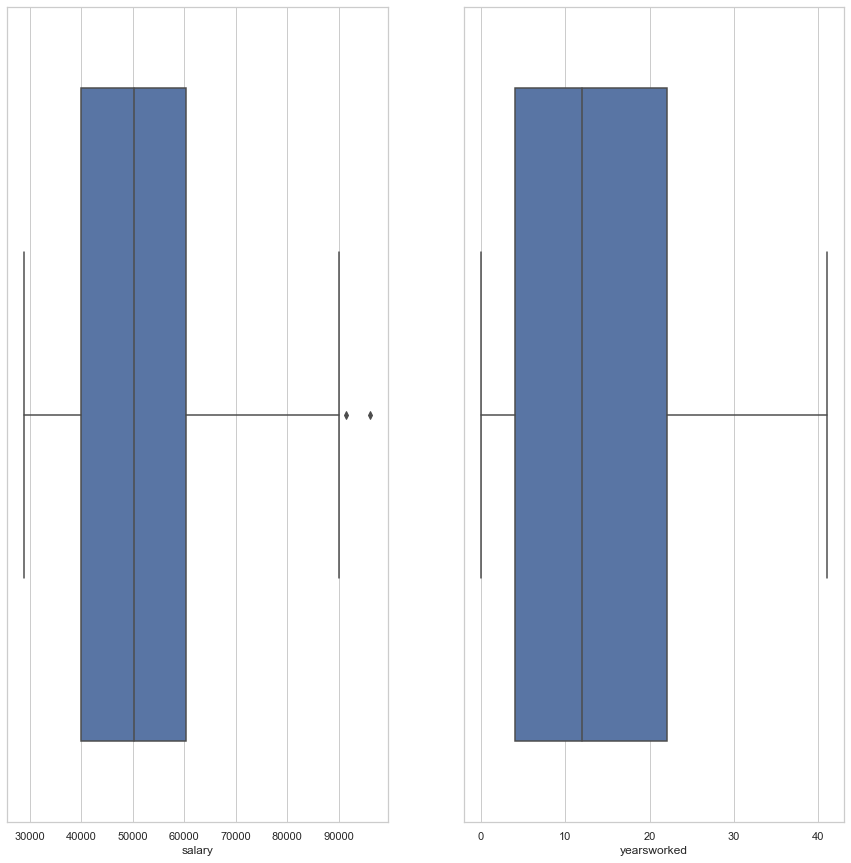

In [7]:
#Checking for extreme values
sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2, figsize=(15, 15))
sns.boxplot(x=salary["salary"], ax=axes[0], data = salary)
sns.boxplot(x=salary["yearsworked"], ax=axes[1],data = salary)


In [8]:
#Removing the outliers
removed_outliers = salary['salary'].between(salary['salary'].quantile(.05), salary['salary'].quantile(.95))


##### Outliers

We have observed <b> two outliers</b> for the salary values, and <b>none</b> for the yearsworked values.

how we intend on dealing with the outliers is to remove them, as they may....

## 3. Spliting data
These are two rather important concepts in data science and data analysis and are used as tools to prevent (or at least minimize) overfitting. We usually fit the model on a training set in order to make predications on a data that wasn’t trained (general data)

In [9]:
#Split our data
x = salary[['exprior','yearsworked','yearsrank','market','degree','otherqual','position', 'male','Field','yearsabs']]
y = salary['salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
y_train = pd.DataFrame(y_train)

### 3.1 Viewing the split data

In [11]:
#showcasing the first 5 observations of the feature variables
X_train.head()


,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
308,0,27,0,0.91,1,0,3,1,4,1
333,0,27,18,1.02,1,0,3,1,2,0
415,0,3,0,0.79,1,0,1,0,3,7
23,0,3,3,1.17,1,0,1,1,1,0
501,0,22,15,0.85,1,0,2,0,2,58


In [12]:
#showcasing the first 5 observations of the response variable (salary)
y_train.head()

,salary
308,51126.0
333,61218.0
415,35000.0
23,62059.0
501,50280.0


In [13]:
#Describing the dataset of the response variable (salary)
y_train.describe()


,salary
count,411.000000
mean,50295.262825
std,12278.204782
min,29000.000000
25%,40000.000000
50%,48941.000000
75%,59055.000000
max,90082.000000


In [14]:
#Describing the dataset of the feature variables
X_train.describe()


,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2.827251,12.671533,6.878345,0.947105,0.968370,0.051095,2.119221,0.756691,2.579075,6.535280
std,4.628316,9.432773,6.355700,0.148848,0.175227,0.220460,0.816235,0.429603,1.119865,15.920706
min,0.000000,0.000000,0.000000,0.720000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,1.000000,11.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,4.000000,21.000000,11.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,112.000000


### Describing the datasets
 - The training dataset contains <b> 80% of the overall dataset </b> and has been divided into two datasets the <b>feautures dataset </b> and the <b>response variable dataset</b>
 - talk about the <b>mean</b>, <b>median</b> and the <b>mode</b>
 

Talk about the distribution:
mean
median
interquartile

## 4. Distribution of the data
The distribution of a statistical data set (or a population) is a listing or function showing all the possible values (or intervals) of the data and how often they occur.

### 4.1 Histograms of salaries and years worked 

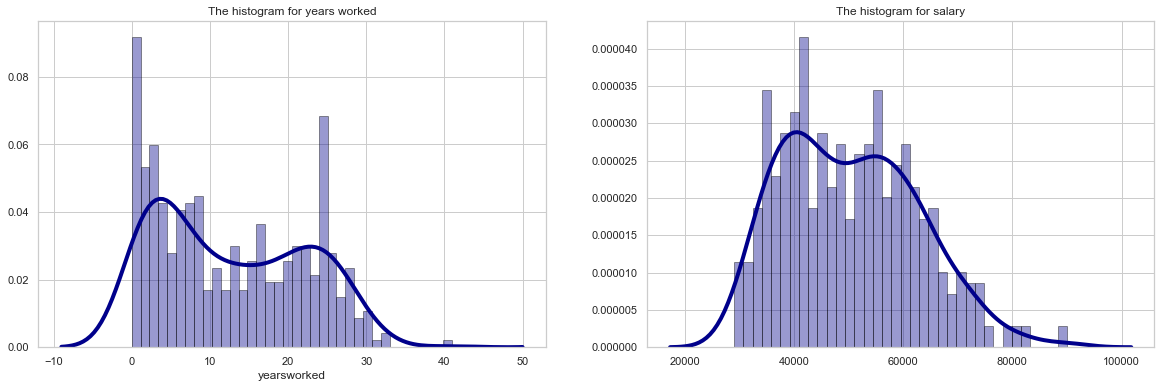

In [15]:
#Creating histograms with density line

sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2,figsize=(20, 6))
sns.distplot(X_train["yearsworked"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])

sns.distplot(y_train, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])

axes[0].set_title('The histogram for years worked')
axes[1].set_title('The histogram for salary')
plt.show()

### 4.2 Scatterplot of salary and years worked

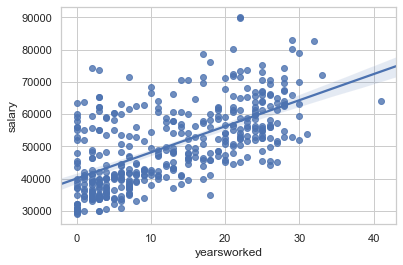

In [16]:
#Creating scatterplot


combined = pd.concat([X_train, y_train], axis=1)
combined.head()
sns.regplot(x=combined['yearsworked'], y=combined['salary'])


Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

The line of best fit shows a strong relationship between years worked and the salary earned. There are some outliers which are the furthest points from the line of best fit.

##### Comment on distribution of the response and the feature

For salaries earned the peak of salaries is between 37000 dollars and 43000 dollars.There are potential outliers in this data. This histogram simply shows that a lot of people earn between 35000 dollars and 47000 dollars. Then only a few earn between 83000 dollars and 89000 dollars. This few is most likey to be the excutive and a lot of people are holding junior positions

## 5. Modeling
### 5.1 Simple linear regression model using statsmodels 

In [17]:
# Fit regression model 
results = smf.ols('salary ~ yearsworked', data=combined).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     256.7
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           3.45e-45
Time:                        05:19:58   Log-Likelihood:                -4352.4
No. Observations:                 411   AIC:                             8709.
Df Residuals:                     409   BIC:                             8717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.005e+04    796.601     50.280      

### 5.2 Analysis of the model

##### 5.2.1 Does the model significantly predict the dependent variable? 

<b> According to the R-squared criterion:</b>
- Because there is only one feature variable modelled, we can either use the R-squared or the adjusted R-squared as the adjusted R-sqaured helps us with penalizing the R-squared for every variable inputed into the model.
- R-sqaured = 0.377 and adjusted R-squared = 0.376
  - So we can sonclude that the salary response variable is explained by 37% of the feauture variable which is number of years worked.
  

<b>According to the pvalue criterion: </b>
-  The pvalue giving in the ols is 0, and this is less than the significance level of 5%. Therefore we reject the null hypothesis stating that there is no evident relationship between the predictor and the response variable.



#####  5.2.2 What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked
- The graph shows that about 37% of the data fits the regression model.

##### 5.2.3 Interpretation of coeficients

<b> Intercept: </b> 
- The coefficient for number of years worked is 40570
  - That is, if the number of years worked is 0, the base salary will be $40570 

<b> Number of years worked: </b> 
- The coefficient for number of years worked is 819.77
  - That is, if the number of years worked increased by one unit, the salary will then increase by $819.77



##### 5.2.4 What do the 95% confidence intervals [0.025, 0.975] mean?

A 95% confidence interval is a range of values that you can be 95% certain that it contains the true mean of the population. Idealy, with regards to the interval,the true population mean value should be on that interval. If a confidence interval does not include a particular value, we can say that it is not likely that the particular value is the true population mean. However, even if a particular value is within the interval, we shouldn't conclude that the population mean equals that specific value.

The confidence interval can also be used for coefficients of the regression model Use the confidence interval to assess the estimate of the population coefficient for each term in the model.

The coefficient for the years worked is 827.1461. The 95% confidence interval is [714.150,940.143]. The coefficient falls on the interval. You can be 95% confident that the confidence interval contains the value of the coefficient for the population.

The same applies for the constant coefficient.

### 5.3 Predictions 

In [18]:
#Calculate expected salary for someone who worked for 12 years

year_12 = pd.DataFrame({'yearsworked':[12]})
prints = results.predict(year_12)
p=prints.iloc[0]
p


49752.464118925214

In [19]:
# if combined.yearsworked == 12: return combined[combined.salary[i]] for i in combined

year_12 = pd.DataFrame(combined[combined.yearsworked == 12]['salary'])
year_12.sort_values(by=['salary'])

,salary
462,40636.00000
476,43958.00000
493,44410.85547
128,48941.00000
122,49667.00000
138,55847.00000
460,57612.00000
454,58946.00000


In [20]:
#Calculate expected salary for someone who worked for 80 years
year_12 = pd.DataFrame({'yearsworked':[80]})
prints = results.predict(year_12)
p=prints.iloc[0]
p

104716.73304881794

In [21]:
# if combined.yearsworked == 80: return combined[combined.salary[i]] for i in combined

year_80 = pd.DataFrame(combined[combined.yearsworked == 80]['salary'])
year_80.sort_values(by=['salary'])

,salary


#### answer
Are there any problems with this prediction? If so, what are they?


There were no problems to make this prediction which is a concern because 80 years of experince is a rare value prediction in this Regression. What does this mean for the predictive model?

## 6. Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

### Correlation Matrix



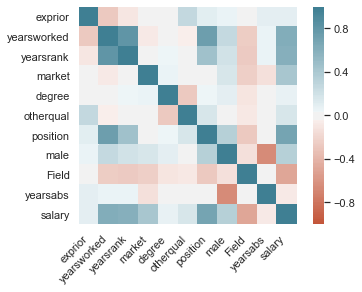

In [25]:
correlation = combined.corr()

ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

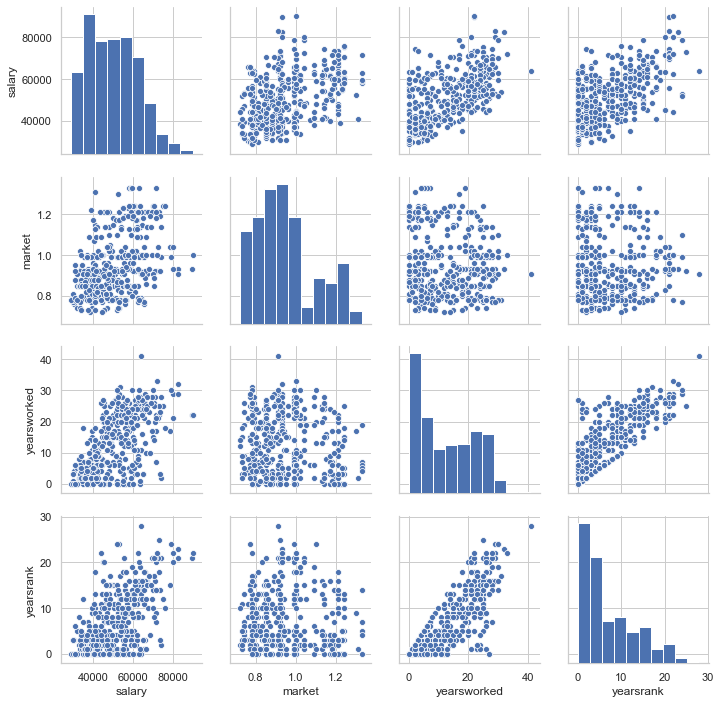

In [26]:
salary_corr = combined[['salary', 'market', 'yearsworked', 'yearsrank']]

sns.pairplot(salary_corr)
plt.show()

### Interpreting correlation graph

- The above table shows the correlation between two variables, showcasing its <b>strengths and direction</b>. This helps us to select the features that have a significant impact on the response variable and therefore helping us predict the salaries.

- looking at the correlation between the response variable Salary and the feature variable yearsworked which is <b>0.623589</b>. This is a <b> fairly strong positive relationship </b>, and therefore we can assume as the number of years worked increases the value of salary also increases.

#### feature selection
We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?


By the correlation map shown in the beginning, the feature that has a good correlation with salary, which is even better than the years worked is position. Years worked at current rank also has a good correlation with salary. The rest of the features have less than 50% correlation with salary. It would not make sense to build a model with features that have no or a very weak relationship with salary

## RSME

In [27]:
pred = results.predict(X_train)

from statsmodels.tools.eval_measures import rmse
rmse = rmse(y_train, pred)
rmse

array([16867.79917532, 16867.79917532, 14543.05774735, 14543.05774735,
       14395.89728859, 13092.10525922, 13618.97145417, 14395.89728859,
       19861.28716863, 12752.58237253, 15472.21161285, 12337.46231452,
       14543.05774735, 15801.59037138, 12266.1323885 , 12831.43101362,
       14993.05121194, 14993.05121194, 15801.59037138, 12617.23880825,
       15472.21161285, 17432.69576738, 17432.69576738, 12310.18094096,
       14993.05121194, 14125.01908635, 14543.05774735, 14395.89728859,
       13618.97145417, 13287.35049415, 13741.85181424, 12831.43101362,
       12406.84477916, 13287.35049415, 12406.84477916, 13989.48802968,
       13741.85181424, 15977.91511087, 15304.70843269, 12275.26554879,
       15977.91511087, 12752.58237253, 12451.92756079, 14543.05774735,
       13396.54843336, 15801.59037138, 14125.01908635, 15977.91511087,
       15977.91511087, 14125.01908635, 13092.10525922, 12554.90866145,
       14125.01908635, 12997.60264   , 17432.69576738, 13618.97145417,
      

In [28]:
pred = results.predict(X_train)

from statsmodels.tools.eval_measures import rmse
rmse = rmse(y_train, pred)
rmse

array([16867.79917532, 16867.79917532, 14543.05774735, 14543.05774735,
       14395.89728859, 13092.10525922, 13618.97145417, 14395.89728859,
       19861.28716863, 12752.58237253, 15472.21161285, 12337.46231452,
       14543.05774735, 15801.59037138, 12266.1323885 , 12831.43101362,
       14993.05121194, 14993.05121194, 15801.59037138, 12617.23880825,
       15472.21161285, 17432.69576738, 17432.69576738, 12310.18094096,
       14993.05121194, 14125.01908635, 14543.05774735, 14395.89728859,
       13618.97145417, 13287.35049415, 13741.85181424, 12831.43101362,
       12406.84477916, 13287.35049415, 12406.84477916, 13989.48802968,
       13741.85181424, 15977.91511087, 15304.70843269, 12275.26554879,
       15977.91511087, 12752.58237253, 12451.92756079, 14543.05774735,
       13396.54843336, 15801.59037138, 14125.01908635, 15977.91511087,
       15977.91511087, 14125.01908635, 13092.10525922, 12554.90866145,
       14125.01908635, 12997.60264   , 17432.69576738, 13618.97145417,
      

How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

Our model performs better on the train dataset than it does on the test set. With this we can now conclude that the model is overfitted. We say this because our model shows low bias but high variance. To better train our model we need to identify relevant variables and terms that you are likely to influence our outcome that we hoping f